In [19]:
# Importing all libraries that needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Read from csv data source
df = pd.read_csv('customer-data.csv')

In [21]:
# Display number missing values per column
df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [22]:
# BUAT TOTAL PELANGGARAN
# Total Pelanggaran : speeding violations + duis + past accidents

df['total_violations'] = df['speeding_violations'] + df['DUIs'] + df['past_accidents']

# Tampilkan kolom total_violations
print(df['total_violations'])

# Cari nilai maksimum total_violations
print('Total Violations Maksimum:', df['total_violations'].max())

# Cari nilai minimum total_violations
print('Total Violations Minimum:', df['total_violations'].min())

0       0
1       0
2       0
3       0
4       3
       ..
9995    1
9996    1
9997    0
9998    3
9999    0
Name: total_violations, Length: 10000, dtype: int64
Total Violations Maksimum: 28
Total Violations Minimum: 0


In [23]:
# Segmentasi Violation Group

def classify_violation(x):
    if x <= 2:
        return 'Low'
    elif x <= 6:
        return 'Medium'
    else:
        return 'High'

df['violation_group'] = df['total_violations'].apply(classify_violation)

print(df['violation_group'].value_counts())

violation_group
Low       5991
Medium    2618
High      1391
Name: count, dtype: int64


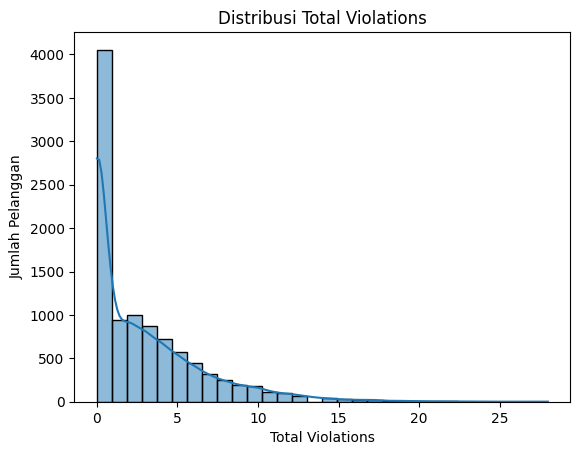

In [24]:
sns.histplot(df['total_violations'], bins=30, kde=True)
plt.title('Distribusi Total Violations')
plt.xlabel('Total Violations')
plt.ylabel('Jumlah Pelanggan')
plt.show()

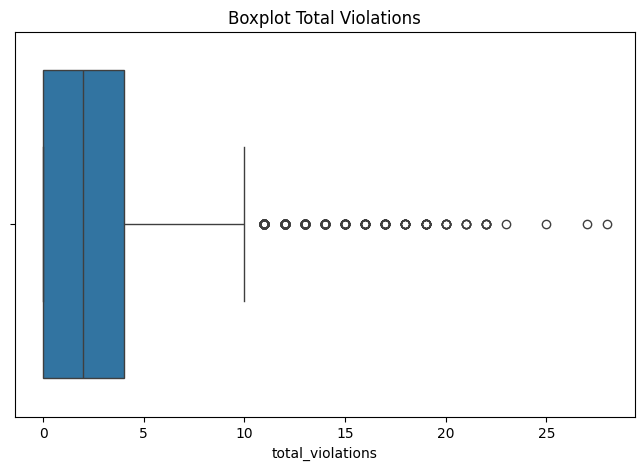

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['total_violations'])
plt.title('Boxplot Total Violations')
plt.show()


In [26]:
#Hitung Probabilitas Klaim per Group

risk_summary = df.groupby('violation_group')['outcome'].mean().reset_index()
print(risk_summary)

  violation_group   outcome
0            High  0.061107
1             Low  0.447338
2          Medium  0.140565


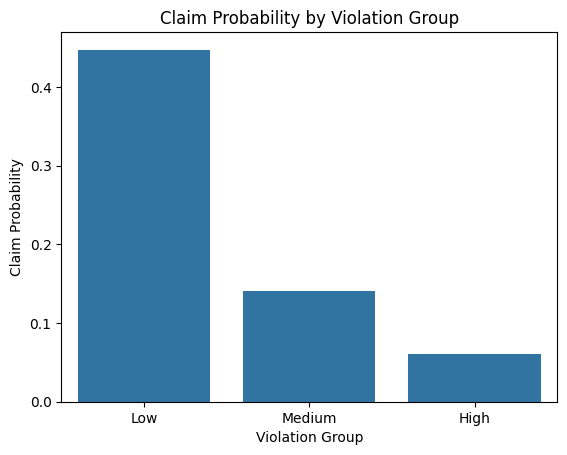

In [27]:
sns.barplot(data=risk_summary, x='violation_group', y='outcome', order=['Low', 'Medium', 'High'])
plt.title('Claim Probability by Violation Group')
plt.ylabel('Claim Probability')
plt.xlabel('Violation Group')
plt.show()


In [28]:
# Hitung Probabilitas Klaim per Violation Group dan Gender

risk_by_gender = df.groupby(['violation_group', 'gender'])['outcome'].mean().reset_index()
print(risk_by_gender)

  violation_group  gender   outcome
0            High  female  0.015432
1            High    male  0.074977
2             Low  female  0.346636
3             Low    male  0.589609
4          Medium  female  0.084890
5          Medium    male  0.186111


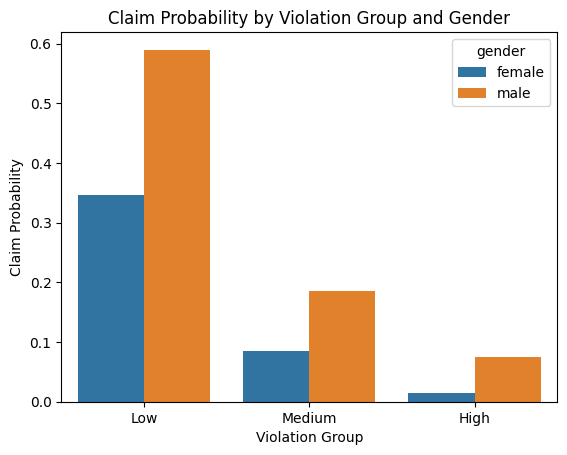

In [29]:
sns.barplot(data=risk_by_gender, x='violation_group', y='outcome', hue='gender', order=['Low', 'Medium', 'High'])
plt.title('Claim Probability by Violation Group and Gender')
plt.ylabel('Claim Probability')
plt.xlabel('Violation Group')
plt.show()

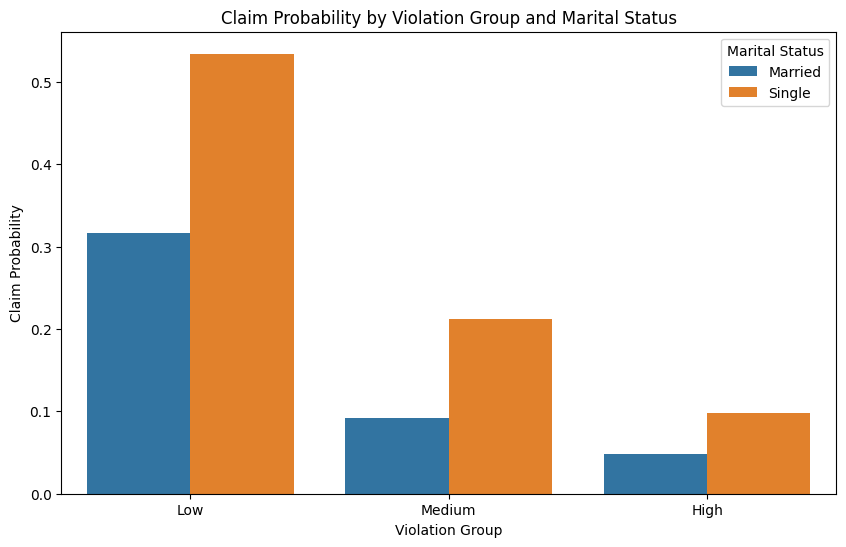

In [32]:
# Bikin label married status
df['married_status'] = df['married'].apply(lambda x: 'Married' if x else 'Single')

# Hitung probabilitas klaim per violation group dan marital status
claim_by_married = df.groupby(['violation_group', 'married_status'])['outcome'].mean().reset_index()

# Visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(data=claim_by_married, x='violation_group', y='outcome', hue='married_status', order=['Low', 'Medium', 'High'])
plt.title('Claim Probability by Violation Group and Marital Status')
plt.xlabel('Violation Group')
plt.ylabel('Claim Probability')
plt.legend(title='Marital Status')
plt.show()

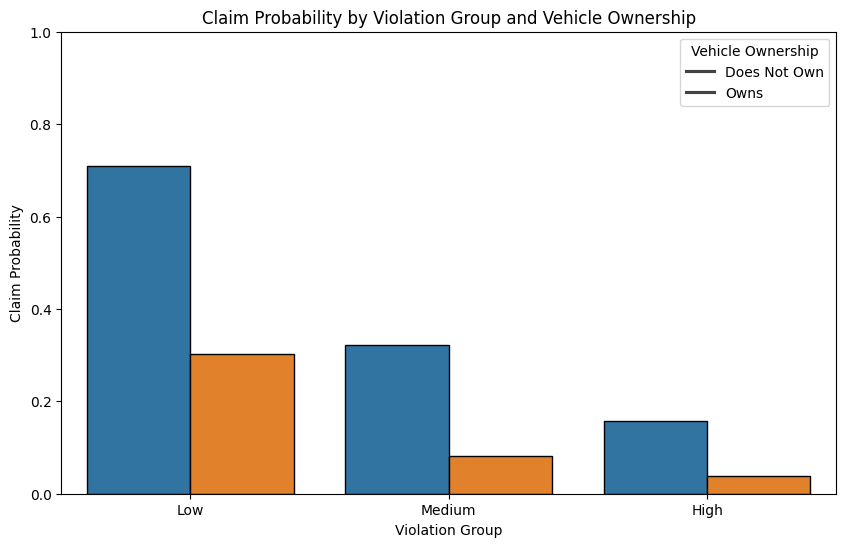

In [33]:
# Hitung probabilitas klaim per violation group dan vehicle ownership
claim_by_vehicle = df.groupby(['violation_group', 'vehicle_ownership'])['outcome'].mean().reset_index()

# Visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(
    data=claim_by_vehicle, 
    x='violation_group', 
    y='outcome', 
    hue='vehicle_ownership', 
    order=['Low', 'Medium', 'High'],
    edgecolor='black'
)
plt.title('Claim Probability by Violation Group and Vehicle Ownership')
plt.xlabel('Violation Group')
plt.ylabel('Claim Probability')
plt.legend(title='Vehicle Ownership', labels=['Does Not Own', 'Owns'])
plt.ylim(0, 1)
plt.show()

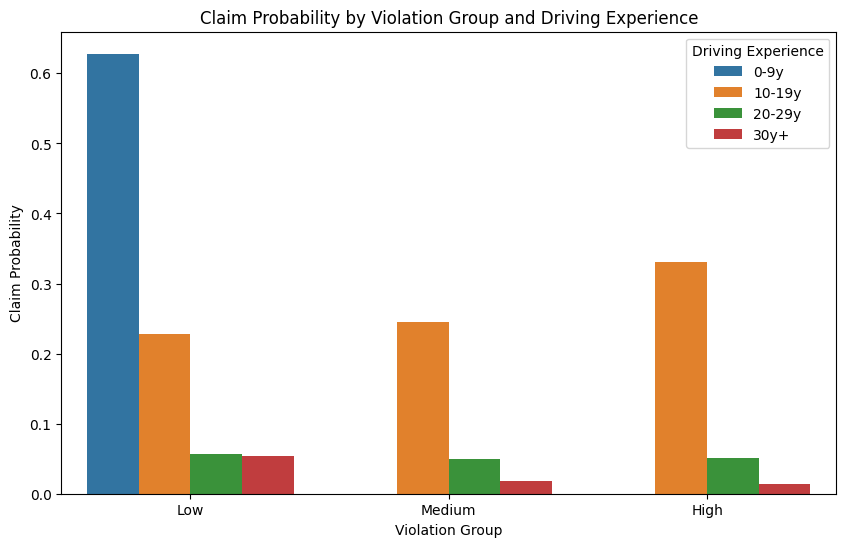

In [ ]:
# Grouping data
risk_by_exp = df.groupby(['violation_group', 'driving_experience'])['outcome'].mean().reset_index()

# Urutan driving experience
order_exp = ['0-9y', '10-19y', '20-29y', '30y+']

# Plotting dengan urutan violation group Low - Medium - High
plt.figure(figsize=(10, 6))
sns.barplot(data=risk_by_exp, x='violation_group', y='outcome', hue='driving_experience', hue_order=order_exp, order=['Low', 'Medium', 'High'])
plt.title('Claim Probability by Violation Group and Driving Experience')
plt.xlabel('Violation Group')
plt.ylabel('Claim Probability')
plt.legend(title='Driving Experience')
plt.show()

RISK TINGGI:
- Violation total <= 2 (Low)
- Single
- Male
- Doesn't own vehicle
- 0-9 years

RISK RENDAH:
- Violation total > 7 (High)
- Married
- Female
- Own Vehicle
- 30+ years

C:\Users\71485\AppData\Local\Temp\ipykernel_27744\2465425688.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compare_df, x='Risk Group', y='Claim Probability', palette='coolwarm')


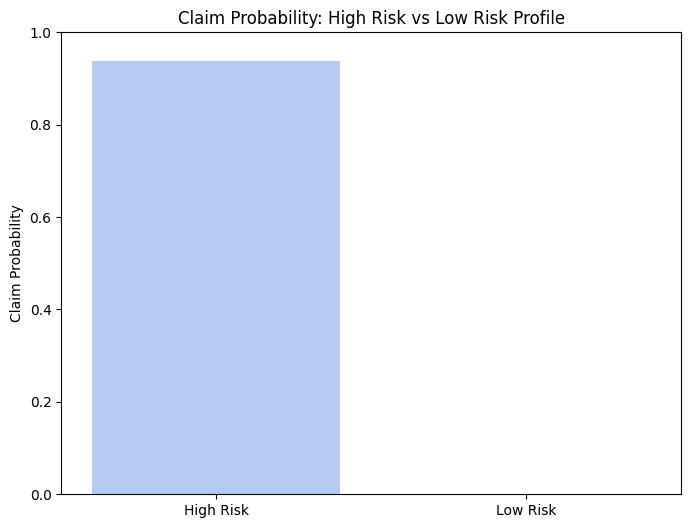

In [ ]:
# Filter High Risk
high_risk = df[
    (df['violation_group'] == 'Low') &
    (df['married'] == False) &
    (df['gender'] == 'male') &
    (df['vehicle_ownership'] == False) &
    (df['driving_experience'] == '0-9y')
]

# Filter Low Risk
low_risk = df[
    (df['violation_group'] == 'High') &
    (df['married'] == True) &
    (df['gender'] == 'female') &
    (df['vehicle_ownership'] == True) &
    (df['driving_experience'] == '30y+')
]

# Hitung probabilitas klaim
high_risk_prob = high_risk['outcome'].mean()
low_risk_prob = low_risk['outcome'].mean()

# Buat dataframe untuk visualisasi
compare_df = pd.DataFrame({
    'Risk Group': ['High Risk', 'Low Risk'],
    'Claim Probability': [high_risk_prob, low_risk_prob]
})

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(data=compare_df, x='Risk Group', y='Claim Probability', palette='coolwarm')
plt.title('Claim Probability: High Risk vs Low Risk Profile')
plt.ylabel('Claim Probability')
plt.xlabel('')
plt.ylim(0, 1)
plt.show()

In [ ]:
print(f"High Risk Claim Probability: {high_risk_prob * 100:.2f}%")
print(f"Low Risk Claim Probability: {low_risk_prob * 100:.2f}%")

High Risk Claim Probability: 93.71%
Low Risk Claim Probability: 0.00%


RISK TINGGI:
- Violation total <= 2 (Low)
- Single
- Male
- Doesn't own vehicle
- 0-9 years

RISK RENDAH:
- Violation total > 7 (High)
- Married
- Female
- Own Vehicle
- 30+ years

- Pengemudi Baru Lebih Sering Klaim
Orang yang baru belajar nyetir (pengalaman 0-9 tahun) paling sering mengajukan klaim asuransi, terutama laki-laki, meskipun mereka masuk dalam kelompok pelanggaran yang rendah. Artinya, walaupun jarang melanggar, mereka tetap sering mengalami kejadian yang butuh klaim.
- Semakin Berpengalaman, Risiko Semakin Kecil
- Laki-laki Lebih Berisiko Dibanding Perempuan

Saran bisnis:
- Terapkan Premi Lebih Tinggi untuk Pengemudi Bar0-9 th/Kasih syarat khusus ex: pelatihan pengemudi tambahan
- Tawarkan Diskon untuk Pengemudi Berpengalaman >20th
- Pantau Ketat Pelanggan dengan Pengalaman 10-19 Tahun
(Bisa buat program loyalitas dengan syarat perilaku berkendara baik.)